In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score

In [37]:
data_raw = pd.read_csv("TrainingWiDS2021.csv")

In [39]:
data_raw.shape

(130157, 181)

In [41]:
# data is too big and will take a lot of time to make graphs so lets subset

# Please do not run this code chunk for the assignment. Doing so will lead to 10% reduction in the score!

data_raw = data_raw.sample(n=2000, random_state=99)

In [42]:
data_raw.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [44]:
data_selected = data_raw[["age", "bmi", "gender", "height", "diabetes_mellitus"]]

In [45]:
data_selected.head()

,age,bmi,gender,height,diabetes_mellitus
38362,NaN,19.531250,M,160.0,0
110388,59.0,14.940186,F,162.6,0
21820,67.0,23.186781,M,177.8,0
63525,63.0,26.975309,M,180.0,0
112919,62.0,31.015070,F,162.6,0


In [46]:
data_selected.diabetes_mellitus.value_counts()

diabetes_mellitus
0    1552
1     448
Name: count, dtype: int64

In [47]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 38362 to 50424
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1925 non-null   float64
 1   bmi                1925 non-null   float64
 2   gender             1999 non-null   object 
 3   height             1963 non-null   float64
 4   diabetes_mellitus  2000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 93.8+ KB


In [48]:
# Note that sklearn decision tree does not work with object data. 

# need to encode and convert this to categorical

# I was running into an issue where it was being encoded to 0 and 1 but they were still object type variable which will give you an error

# always check the error messages and go back to fix your code
le= LabelEncoder()

# also note if you run this line twice it will give ou an error


In [50]:

data_selected.loc[:,"gender"] = le.fit_transform(data_selected["gender"])

data_selected.loc[:,"gender"] = data_selected["gender"].astype("category")

data_selected.loc[:,"diabetes_mellitus"] = data_selected["diabetes_mellitus"].astype("category")

In [51]:
data_selected.gender.value_counts()

gender
1    1094
0     905
2       1
Name: count, dtype: int64

In [52]:
data_selected = data_selected[data_selected.gender!=2]

In [53]:
data_selected.gender.value_counts()

gender
1    1094
0     905
Name: count, dtype: int64

In [54]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 38362 to 50424
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                1924 non-null   float64 
 1   bmi                1924 non-null   float64 
 2   gender             1999 non-null   object  
 3   height             1962 non-null   float64 
 4   diabetes_mellitus  1999 non-null   category
dtypes: category(1), float64(3), object(1)
memory usage: 80.2+ KB


In [55]:
# lets remove observations that seems incorrect
# also restrict by age

# age >20 or age <65
# bmi >15 bmi <45
# height >100 and <200

# remove any missing 

# PLEASE NOTE this is just being done as an example to speed up things!!! 
# THIS IS NOT SOMETHING THAT YOU DO ALL THE TIME!!!!

In [56]:
data_final =data_selected[(data_selected.age>=20) & (data_selected.age<=65) & 
                          (data_selected.bmi>=25) & (data_selected.bmi<45) &
                          (data_selected.height>100) & (data_selected.height<200)].dropna()

In [57]:
data_final.head()

,age,bmi,gender,height,diabetes_mellitus
63525,63.0,26.975309,1,180.0,0
112919,62.0,31.015070,0,162.6,0
128320,42.0,40.774571,1,177.8,1
37234,64.0,25.558697,1,182.9,1
58085,52.0,29.247525,1,190.5,0


In [58]:
data_final.isna().sum()

age                  0
bmi                  0
gender               0
height               0
diabetes_mellitus    0
dtype: int64

<Axes: ylabel='Count'>

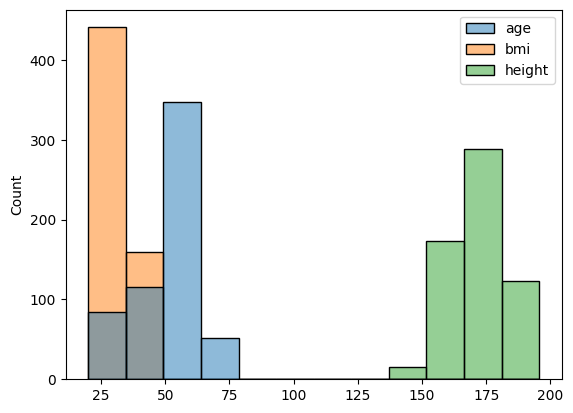

In [59]:
sns.histplot(data_final[["age", "bmi", "height"]])

In [60]:
# Now lets create test train split
y = data_final["diabetes_mellitus"]
X = data_final.drop(columns=["diabetes_mellitus"])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [62]:
# lets do a vanilla decision tree classifier
DT_classifier = DecisionTreeClassifier()

In [63]:
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_pred = DT_classifier.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.6944444444444444

[Text(0.38666666666666666, 0.975, 'age <= 49.5\ngini = 0.334\nsamples = 420\nvalue = [331, 89]\nclass = 0'),
 Text(0.07757575757575758, 0.925, 'height <= 153.65\ngini = 0.213\nsamples = 140\nvalue = [123, 17]\nclass = 0'),
 Text(0.03878787878787879, 0.875, 'bmi <= 32.4\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = 0'),
 Text(0.019393939393939394, 0.825, 'age <= 24.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(0.009696969696969697, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.02909090909090909, 0.775, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0'),
 Text(0.05818181818181818, 0.825, 'age <= 33.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.048484848484848485, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.06787878787878789, 0.775, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.11636363636363636, 0.875, 'bmi <= 43.321\ngini = 0.181\nsamples = 129\nvalue = [116, 13]\nclass =

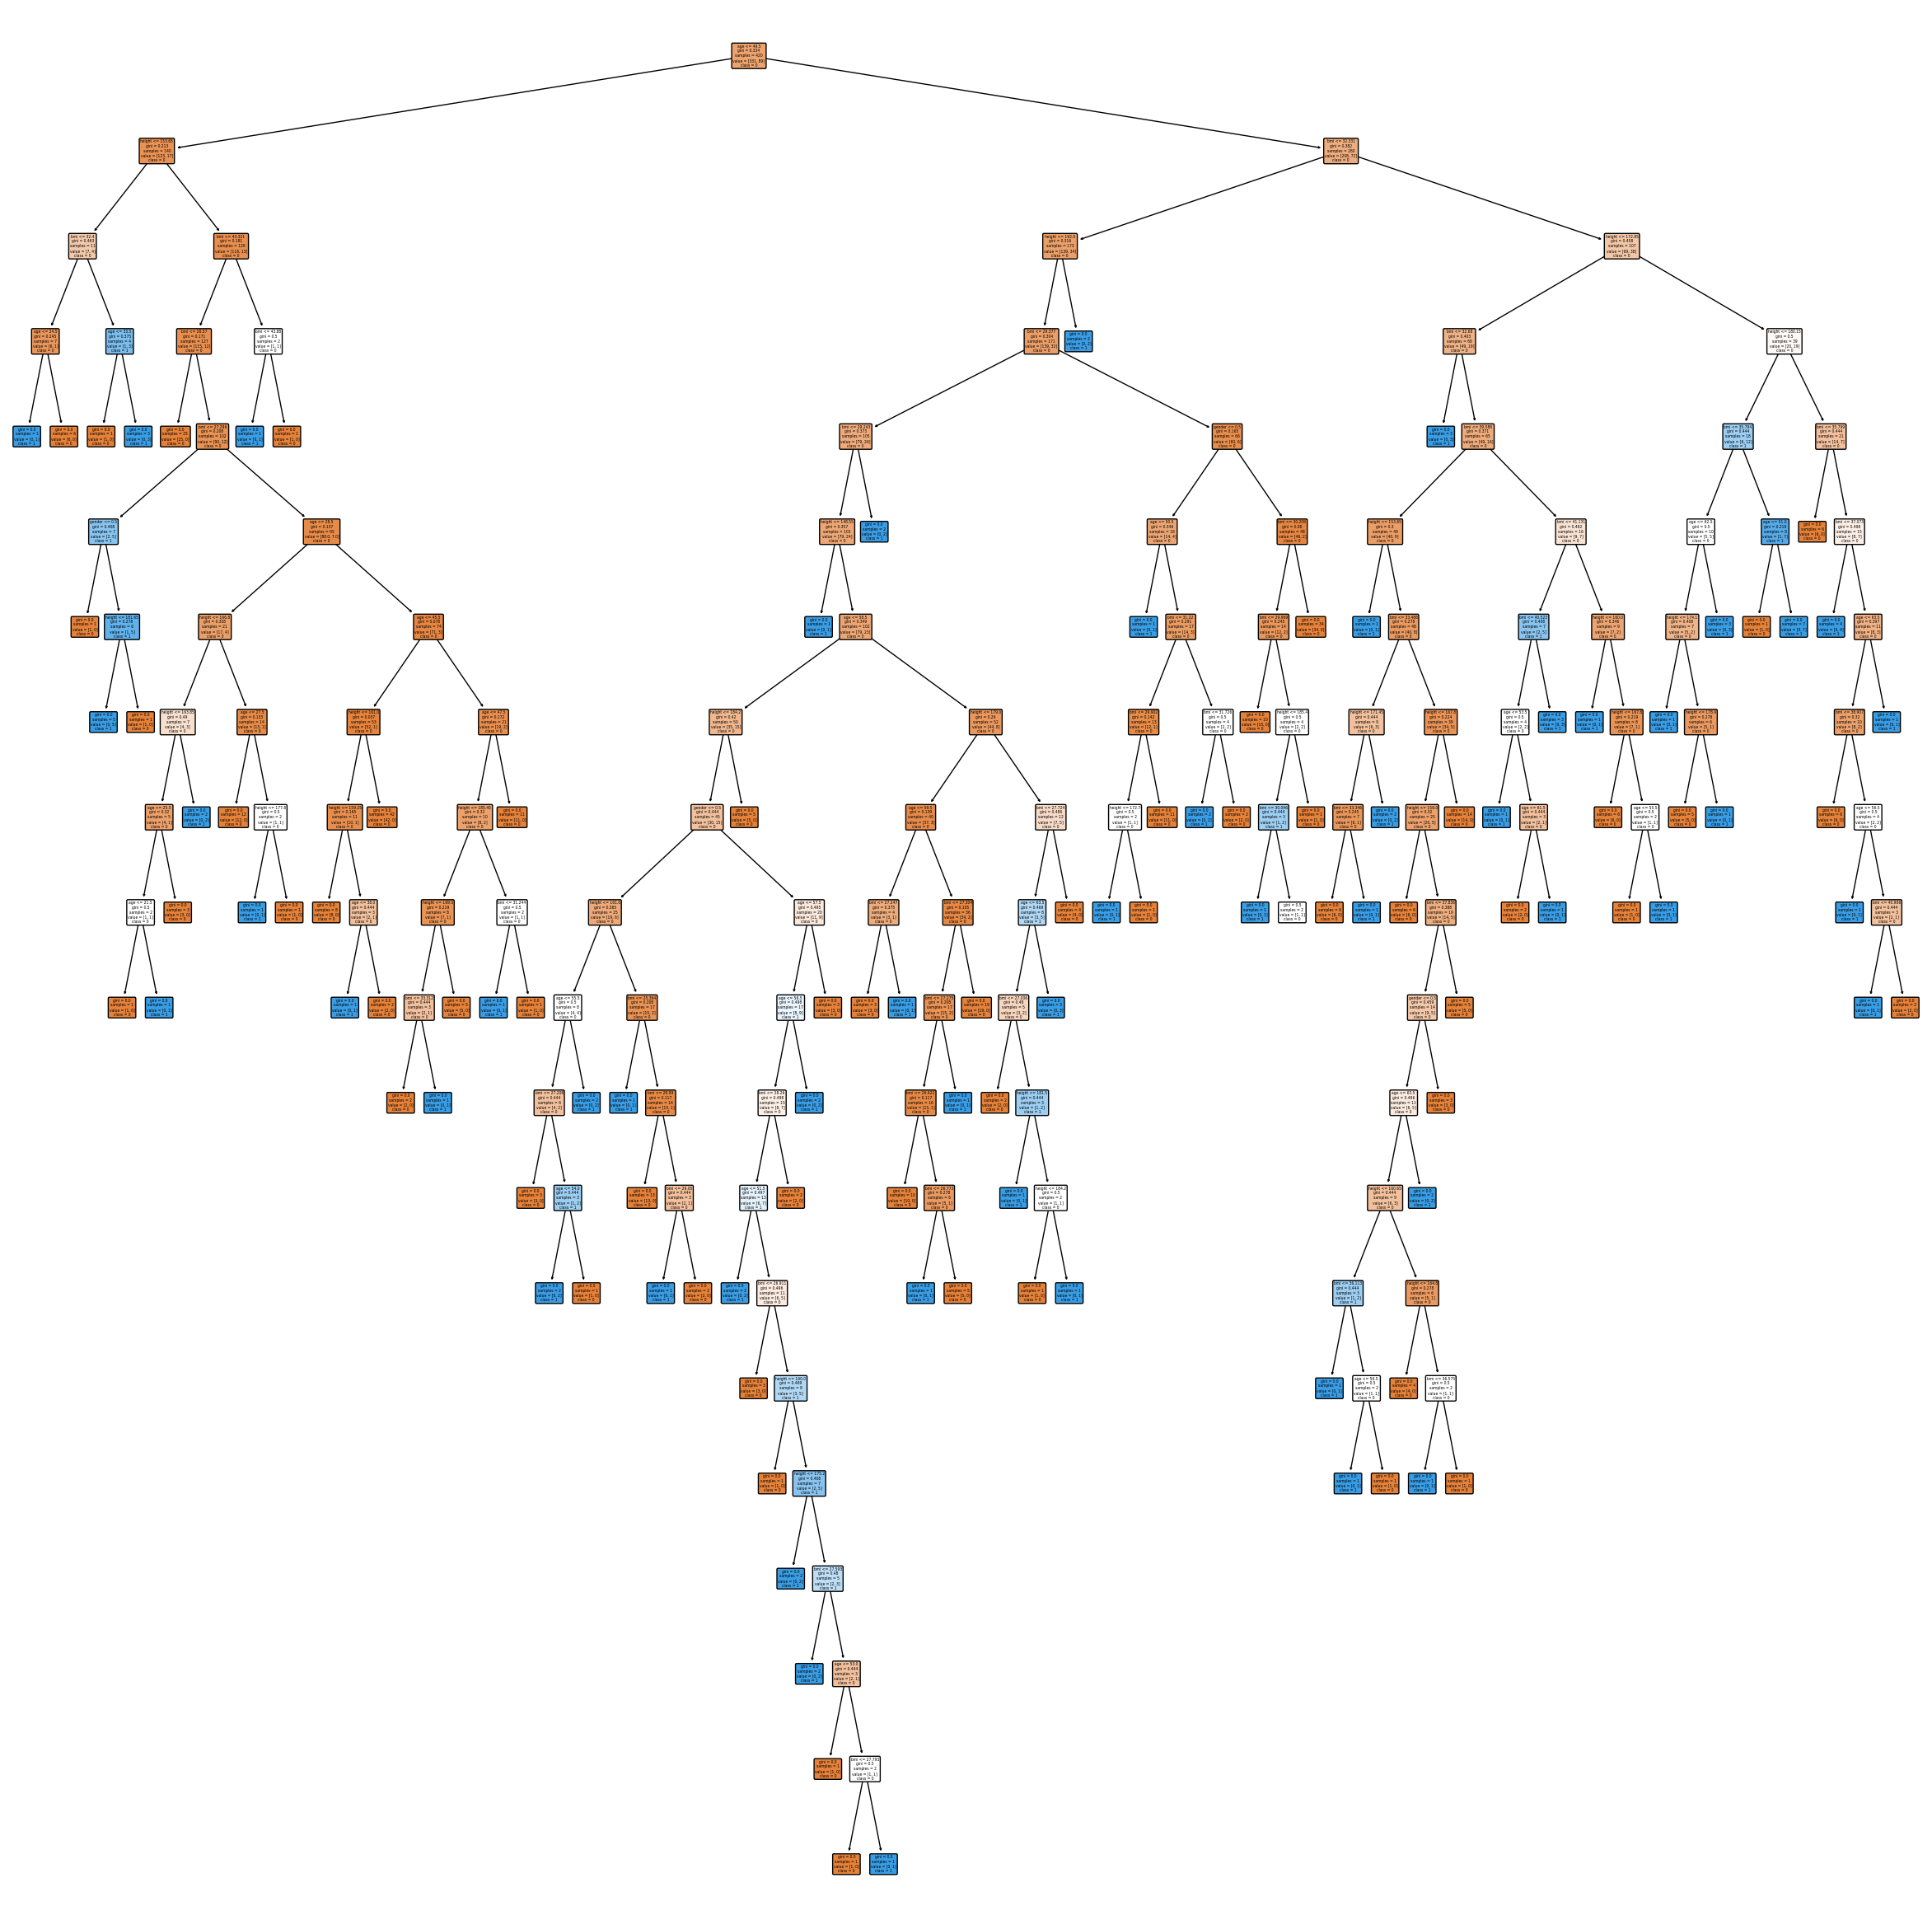

In [66]:
plt.figure(figsize=(30, 30))
plot_tree(DT_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

In [ ]:
# so many branches this is not good.

# lets change the parameters of decision treee

Pruning is a technique used to prevent overfitting in decision tree models, where the tree becomes overly complex and fits too closely to the training data, resulting in poor generalization to new, unseen data.

Here's a brief description of each parameter:

max_depth: This parameter specifies the maximum depth of the decision tree. Limiting the depth of the tree can prevent overfitting by restricting the number of splits the tree can make. A smaller max_depth value results in a shallower tree, which tends to generalize better to new data.

min_samples_leaf: This parameter sets the minimum number of samples required to be at a leaf node. A leaf node is a node without any children (i.e., it is the endpoint of a branch). Setting a minimum number of samples for leaf nodes prevents the tree from splitting nodes too finely, which can lead to overfitting. A higher value for min_samples_leaf encourages the tree to make simpler, more generalized decisions.

min_samples_split: This parameter sets the minimum number of samples required to split an internal node. When a node has fewer samples than min_samples_split, it will not be split, and it will become a leaf node. Similar to min_samples_leaf, setting a minimum number of samples for splitting internal nodes helps prevent overfitting by avoiding overly fine splits in the tree.

By tuning these pruning parameters, you can control the complexity of the decision tree and prevent it from memorizing the training data too closely, leading to better generalization performance on unseen data. 

In [73]:
DT_clf_pruned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [74]:
DT_clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [75]:
y_pred = DT_clf_pruned.predict(X_test)

In [76]:
y_test.value_counts()

diabetes_mellitus
0    143
1     37
Name: count, dtype: int64

In [77]:
accuracy_score(y_test, y_pred)

0.7388888888888889

[Text(0.34539473684210525, 0.9166666666666666, 'age <= 49.5\ngini = 0.334\nsamples = 420\nvalue = [331, 89]\nclass = 0'),
 Text(0.10526315789473684, 0.75, 'height <= 153.65\ngini = 0.213\nsamples = 140\nvalue = [123, 17]\nclass = 0'),
 Text(0.05263157894736842, 0.5833333333333334, 'bmi <= 31.77\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = 0'),
 Text(0.02631578947368421, 0.4166666666666667, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.07894736842105263, 0.4166666666666667, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = 1'),
 Text(0.15789473684210525, 0.5833333333333334, 'bmi <= 26.57\ngini = 0.181\nsamples = 129\nvalue = [116, 13]\nclass = 0'),
 Text(0.13157894736842105, 0.4166666666666667, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 0'),
 Text(0.18421052631578946, 0.4166666666666667, 'bmi <= 27.296\ngini = 0.219\nsamples = 104\nvalue = [91, 13]\nclass = 0'),
 Text(0.15789473684210525, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = 1'),

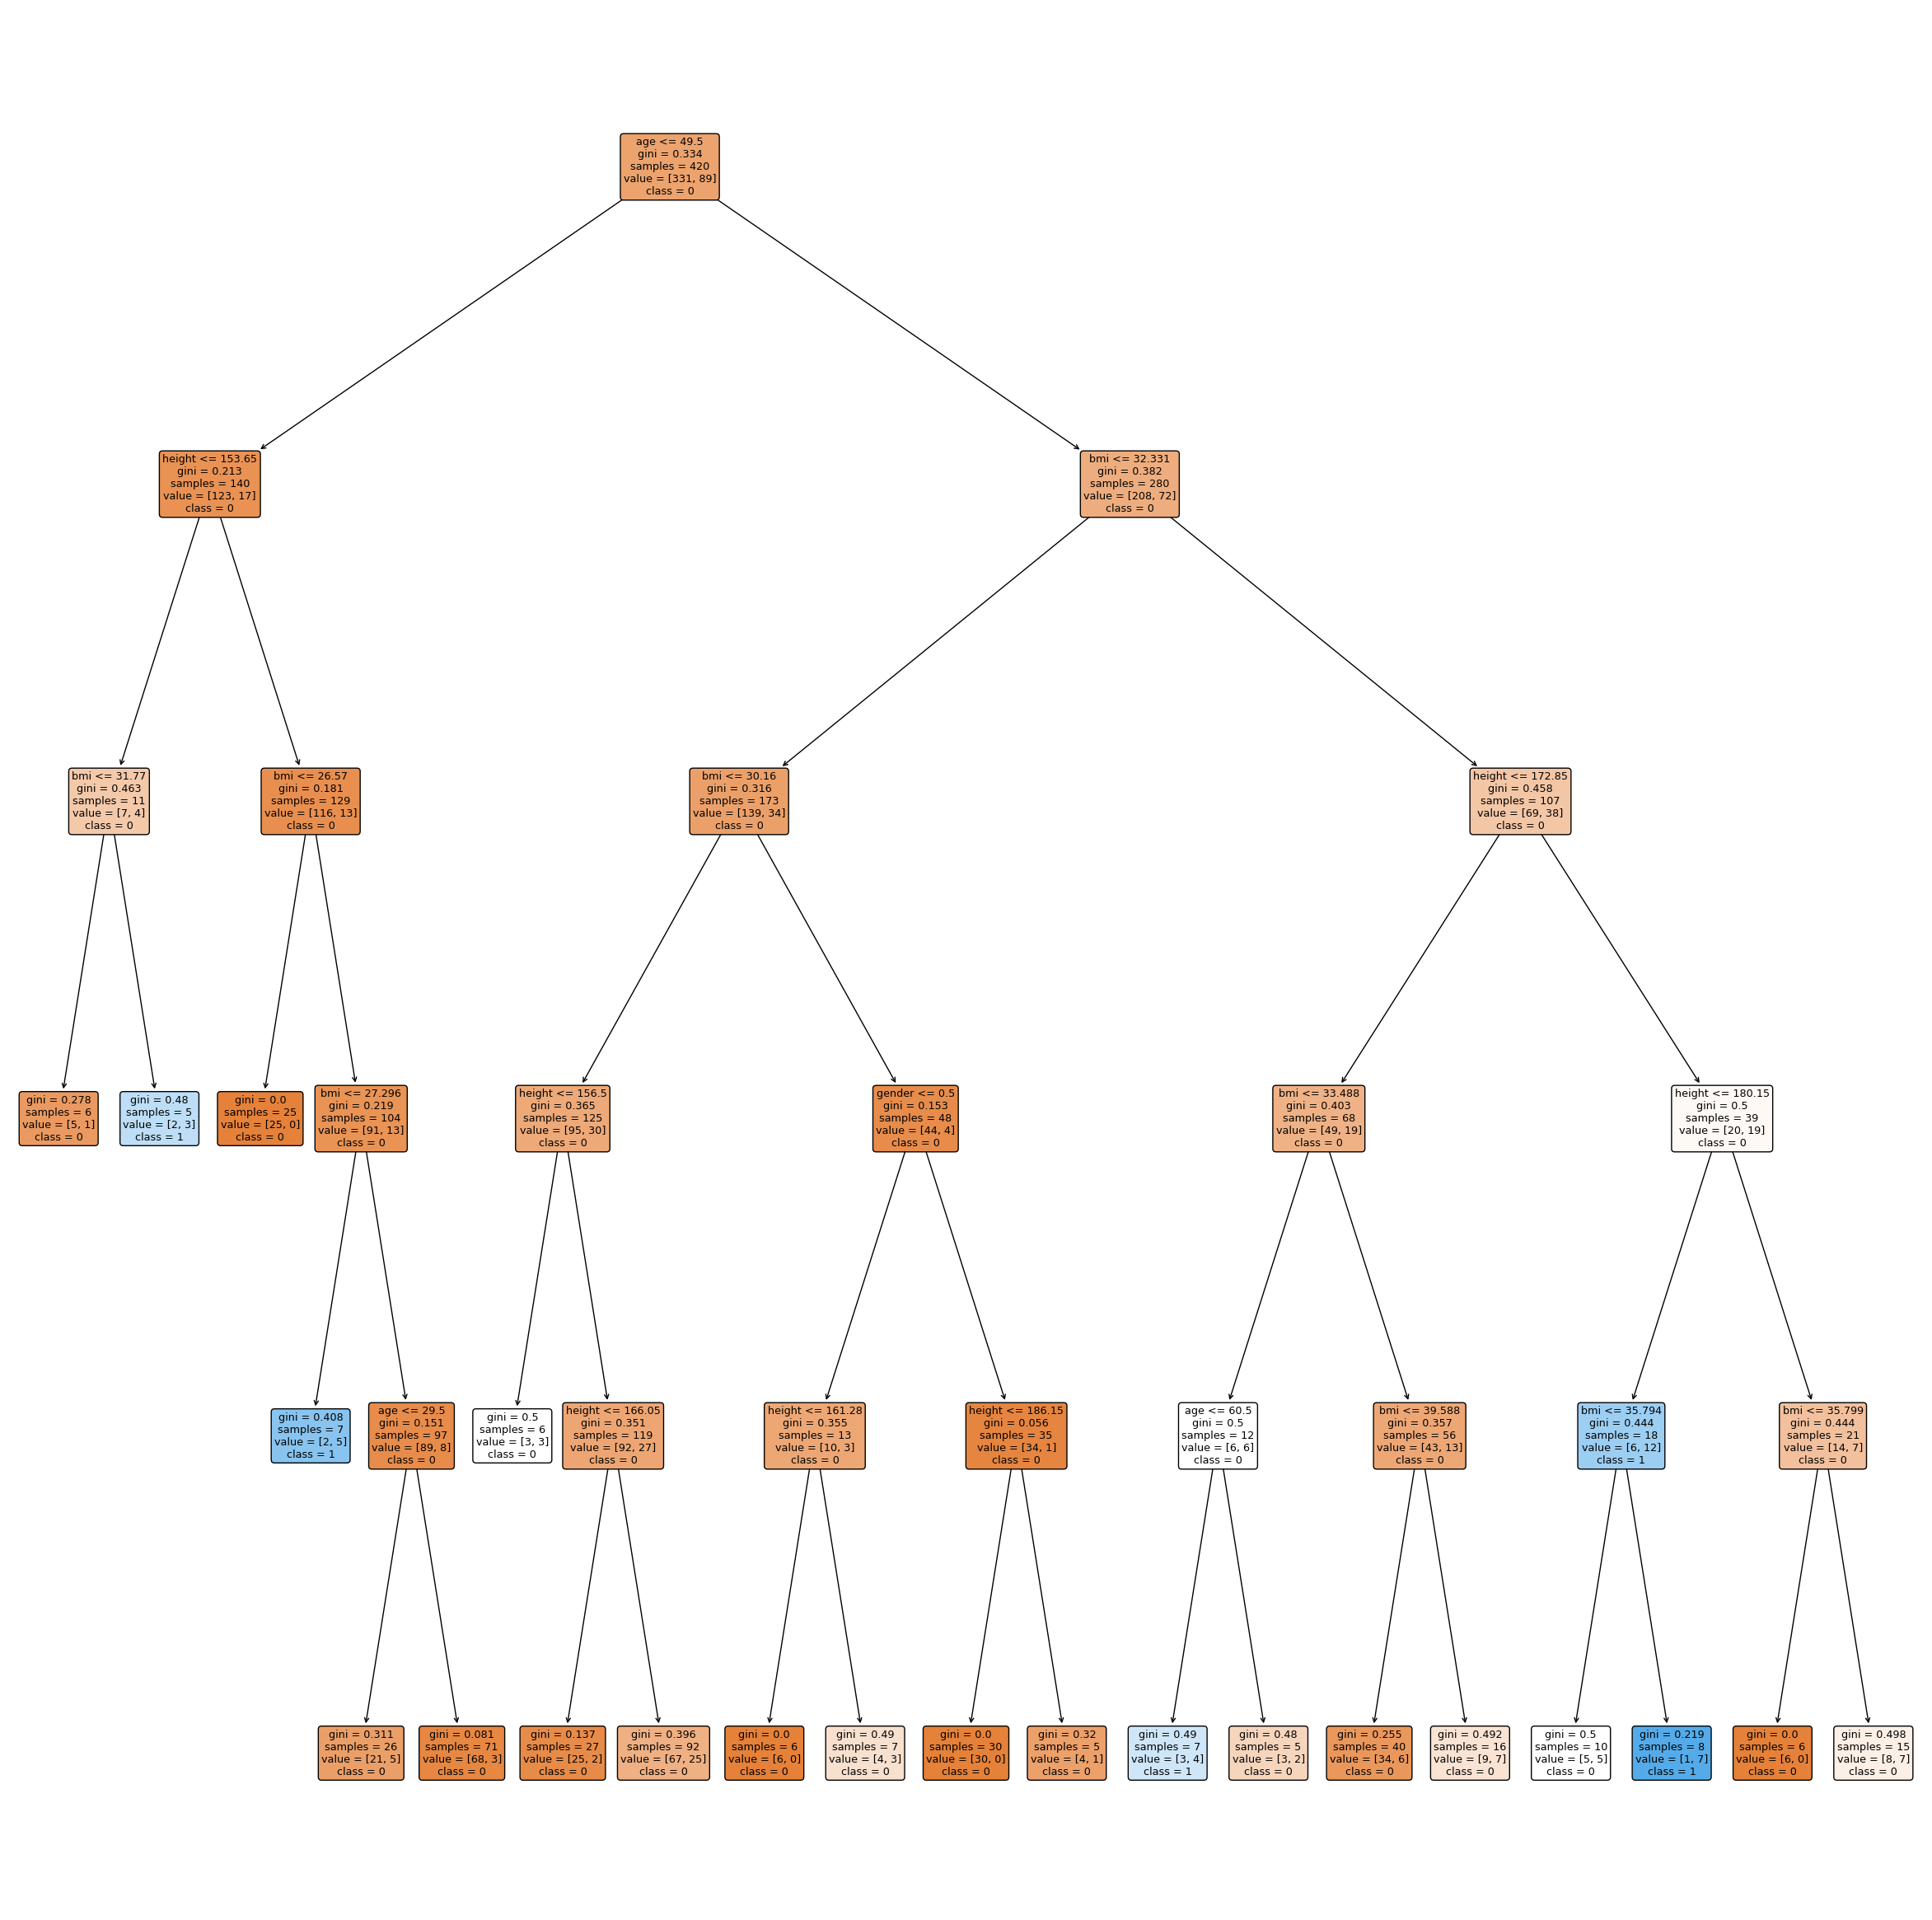

In [78]:
plt.figure(figsize=(30, 30))
plot_tree(DT_clf_pruned, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)